In [1]:
import sys
sys.path.append('../')
import sqlite3
import json
from backtester import *
from fxcmtoken import major_forex_pairs
from sklearn.model_selection import train_test_split
from datetime import datetime

major_forex_pairs

['EUR/USD', 'GBP/USD', 'USD/JPY', 'USD/CHF', 'USD/CAD', 'AUD/USD', 'NZD/USD']

In [2]:
freq = 'm15'
conn = sqlite3.connect(f'../PriceData/PriceData_{freq}.db')
ticker = major_forex_pairs[6]
print(ticker)
data = pd.read_sql(f"SELECT * FROM '{ticker}'", conn, parse_dates=['date'], index_col=['date'])
conn.close()
columns = ['open', 'high', 'low', 'close']
for col in columns:
    data[col] = data[['bid'+col, 'ask'+col]].mean(axis=1)
print(data.shape)
# display(data)
test_size = 0.048 # m15
test_len = int(test_size * len(data))
print("test length", test_len)
# train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)
# data = train_data
# data = test_data
# print(data.shape)
display(data)

NZD/USD
(10000, 13)
test length 480


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close
date,,,,,,,,,,,,,
2021-08-03 11:30:00,0.70164,0.70113,0.70171,0.70103,0.70183,0.70132,0.70189,0.70122,1170,0.701735,0.701800,0.701125,0.701225
2021-08-03 11:45:00,0.70113,0.70170,0.70173,0.70113,0.70132,0.70189,0.70190,0.70131,958,0.701225,0.701815,0.701220,0.701795
2021-08-03 12:00:00,0.70170,0.70094,0.70177,0.70071,0.70189,0.70112,0.70194,0.70091,2618,0.701795,0.701855,0.700810,0.701030
2021-08-03 12:15:00,0.70094,0.70034,0.70103,0.70013,0.70112,0.70050,0.70121,0.70032,3445,0.701030,0.701120,0.700225,0.700420
2021-08-03 12:30:00,0.70034,0.69995,0.70096,0.69979,0.70050,0.70013,0.70114,0.69997,3086,0.700420,0.701050,0.699880,0.700040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24 17:00:00,0.68111,0.68104,0.68120,0.68095,0.68160,0.68148,0.68165,0.68114,2311,0.681355,0.681425,0.681045,0.681260
2021-12-24 17:15:00,0.68104,0.68118,0.68125,0.68088,0.68149,0.68155,0.68165,0.68112,3076,0.681265,0.681450,0.681000,0.681365
2021-12-24 17:30:00,0.68118,0.68116,0.68144,0.68112,0.68154,0.68160,0.68177,0.68149,2201,0.681360,0.681605,0.681305,0.681380


In [3]:
bb = ta.volatility.BollingerBands(close=data['close'], window=20, window_dev=2, fillna=False)
data['bb_high'] = bb.bollinger_hband()
data['bb_avg'] = bb.bollinger_mavg()
data['bb_low'] = bb.bollinger_lband()
data['bb_perc'] = bb.bollinger_pband()
data.dropna(inplace=True)
display(data.head())
print(data.shape)

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close,bb_high,bb_avg,bb_low,bb_perc
date,,,,,,,,,,,,,,,,,
2021-08-03 16:15:00,0.70078,0.70095,0.70108,0.70077,0.70097,0.70112,0.70125,0.70095,1872,0.700875,0.701165,0.700860,0.701035,0.701855,0.700373,0.698892,0.723341
2021-08-03 16:30:00,0.70095,0.70066,0.70095,0.70063,0.70112,0.70084,0.70113,0.70081,1471,0.701035,0.701040,0.700720,0.700750,0.701790,0.700349,0.698909,0.638988
2021-08-03 16:45:00,0.70066,0.70082,0.70097,0.70054,0.70084,0.70100,0.70114,0.70072,1232,0.700750,0.701055,0.700630,0.700910,0.701614,0.700305,0.698996,0.731034
2021-08-03 17:00:00,0.70082,0.70085,0.70108,0.70077,0.70100,0.70104,0.70126,0.70094,1178,0.700910,0.701170,0.700855,0.700945,0.701601,0.700301,0.699001,0.747718
2021-08-03 17:15:00,0.70085,0.70059,0.70095,0.70054,0.70104,0.70077,0.70113,0.70072,1098,0.700945,0.701040,0.700630,0.700680,0.701624,0.700314,0.699004,0.639745


(9981, 17)


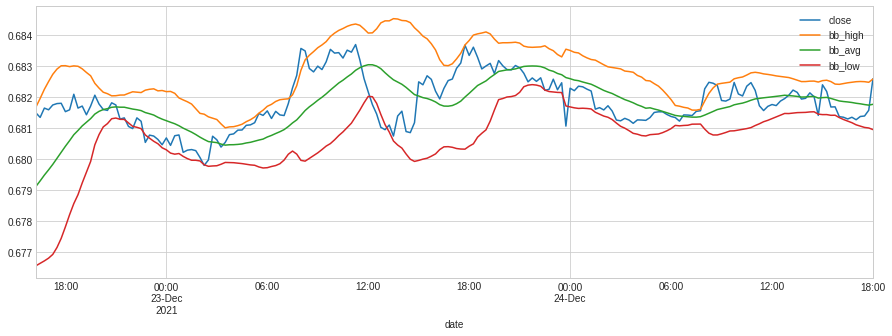

In [4]:
data[['close', 'bb_high', 'bb_avg', 'bb_low']].iloc[-200:].plot(figsize=(15,5))
plt.show()

In [5]:
if data.shape[0] > test_len:
    data = data.iloc[-test_len:]
else:
    pass

In [6]:
# price < bb_low --> long
# price > bb_high --> short
# price croos bb_avg --> neutral

data['distance'] = data['close'] - data['bb_avg']
data['bb_signal'] = np.where(data['close'] <= data['bb_low'], 1,
                    np.where(data['close'] >= data['bb_high'], -1, 
                    np.where(data['distance']*data['distance'].shift(1)<0, 0, 0)))
data['bb_signal'] = data['bb_signal'].ffill().fillna(0)

In [7]:
print('Positions')
print(data['bb_signal'].value_counts())
print('-'*50)
print('Positions change')
print(data['bb_signal'].diff(1).apply(np.abs).value_counts())

Positions
 0    422
-1     33
 1     25
Name: bb_signal, dtype: int64
--------------------------------------------------
Positions change
0.0    420
1.0     59
Name: bb_signal, dtype: int64


  0%|          | 0/479 [00:00<?, ?it/s]

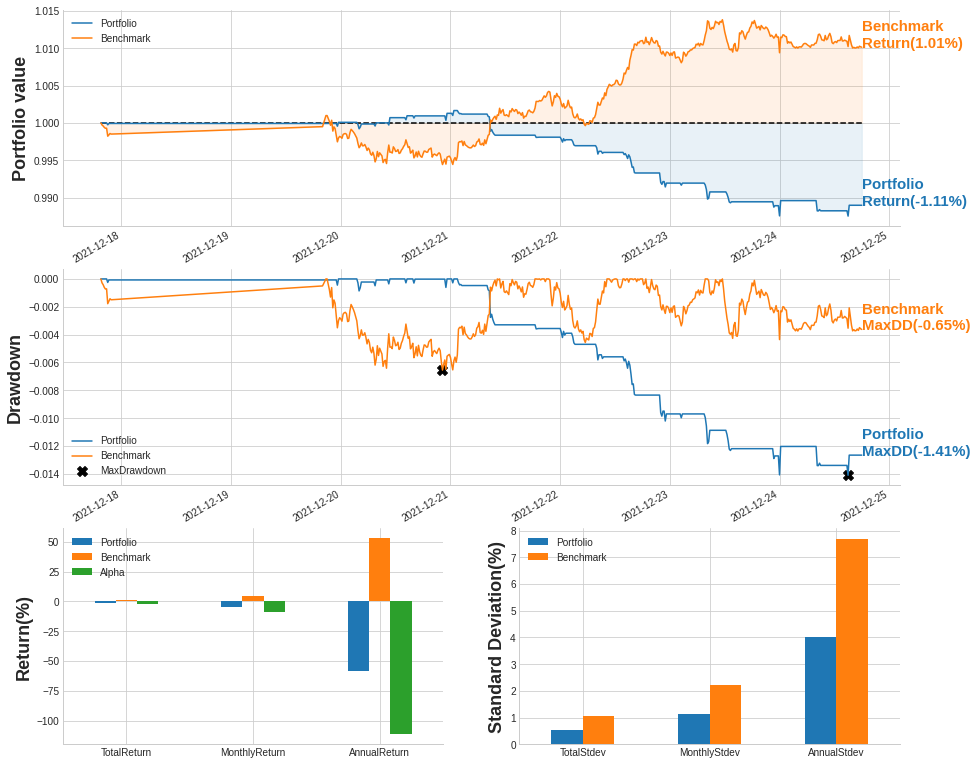

----------------------------------------------------------------------
Data length: |6 days 22:30:00|
Data range from |2021-12-17 19:30:00| to |2021-12-24 18:00:00|
----------------------------------------------------------------------
***** Portfolio Returns in percentage(%) *****
╒═══════════════╤═════════════╤═════════════╤══════════╕
│               │   Portfolio │   Benchmark │    Alpha │
╞═══════════════╪═════════════╪═════════════╪══════════╡
│ TotalReturn   │      -1.111 │       1.010 │   -2.121 │
├───────────────┼─────────────┼─────────────┼──────────┤
│ MonthlyReturn │      -4.805 │       4.367 │   -9.172 │
├───────────────┼─────────────┼─────────────┼──────────┤
│ AnnualReturn  │     -58.456 │      53.137 │ -111.593 │
╘═══════════════╧═════════════╧═════════════╧══════════╛
***** Portfolio Standard Deviation in percentage(%) *****
╒══════════════╤═════════════╤═════════════╕
│              │   Portfolio │   Benchmark │
╞══════════════╪═════════════╪═════════════╡
│ TotalStde

In [8]:
backtest = IterativeBacktester(data, data['bb_signal'], freq)
backtest.backtest()
backtest.results()